**INPUT**

In [1]:
#Importing Necessary Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Reading the Given Dataset using Pandas
data = pd.read_csv('../input/Power.csv')
#Extracting only the necessary columns from the Dataset for Analysis and Forecast
df = data[['DateTime','LCLid','KWh']]

In [66]:
#Description of The Dataset
include =['object', 'float', 'int']
print("DESCRIPTION")
print(df.describe(include=include))

DESCRIPTION
                           DateTime      LCLid            KWh
count                        999971     999971  999971.000000
unique                        39095         30            NaN
top     2012-11-20 00:00:00.0000000  MAC000018            NaN
freq                             58      39081            NaN
mean                            NaN        NaN       0.239580
std                             NaN        NaN       0.387533
min                             NaN        NaN       0.000000
25%                             NaN        NaN       0.060000
50%                             NaN        NaN       0.129000
75%                             NaN        NaN       0.255000
max                             NaN        NaN       6.528000


In [67]:
#The top five rows of the dataset
print(df.head())

                      DateTime      LCLid  KWh
0  2012-10-12 00:30:00.0000000  MAC000002  0.0
1  2012-10-12 01:00:00.0000000  MAC000002  0.0
2  2012-10-12 01:30:00.0000000  MAC000002  0.0
3  2012-10-12 02:00:00.0000000  MAC000002  0.0
4  2012-10-12 02:30:00.0000000  MAC000002  0.0


In [68]:
#The last five rows of the dataset
print(df.tail())

                           DateTime      LCLid    KWh
999966  2012-11-08 08:00:00.0000000  MAC000036  0.228
999967  2012-11-08 08:30:00.0000000  MAC000036  0.042
999968  2012-11-08 09:00:00.0000000  MAC000036  0.076
999969  2012-11-08 09:30:00.0000000  MAC000036  0.070
999970  2012-11-08 10:00:00.0000000  MAC000036  0.005


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999971 entries, 0 to 999970
Data columns (total 3 columns):
DateTime    999971 non-null object
LCLid       999971 non-null object
KWh         999971 non-null float64
dtypes: float64(1), object(2)
memory usage: 22.9+ MB


**ANALYSIS**

In [70]:
#Creating Data for Analysis
data=df
#Setting the index of the Data to be the HOUSE ID
data.index=data.LCLid
#removing the column LCLid since it has been set as index
data=data.drop('LCLid',axis=1)

In [71]:
data.tail()

,DateTime,KWh
LCLid,,
MAC000036,2012-11-08 08:00:00.0000000,0.228
MAC000036,2012-11-08 08:30:00.0000000,0.042
MAC000036,2012-11-08 09:00:00.0000000,0.076
MAC000036,2012-11-08 09:30:00.0000000,0.070
MAC000036,2012-11-08 10:00:00.0000000,0.005


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba400869b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba400930b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba40086860>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba40093748>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba40093a90>],
 'means': []}

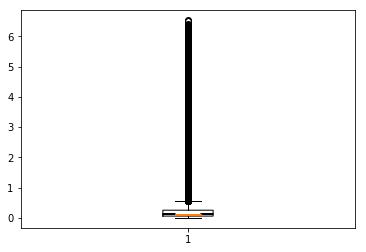

In [81]:
plt.boxplot(data.KWh,data.index.any)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

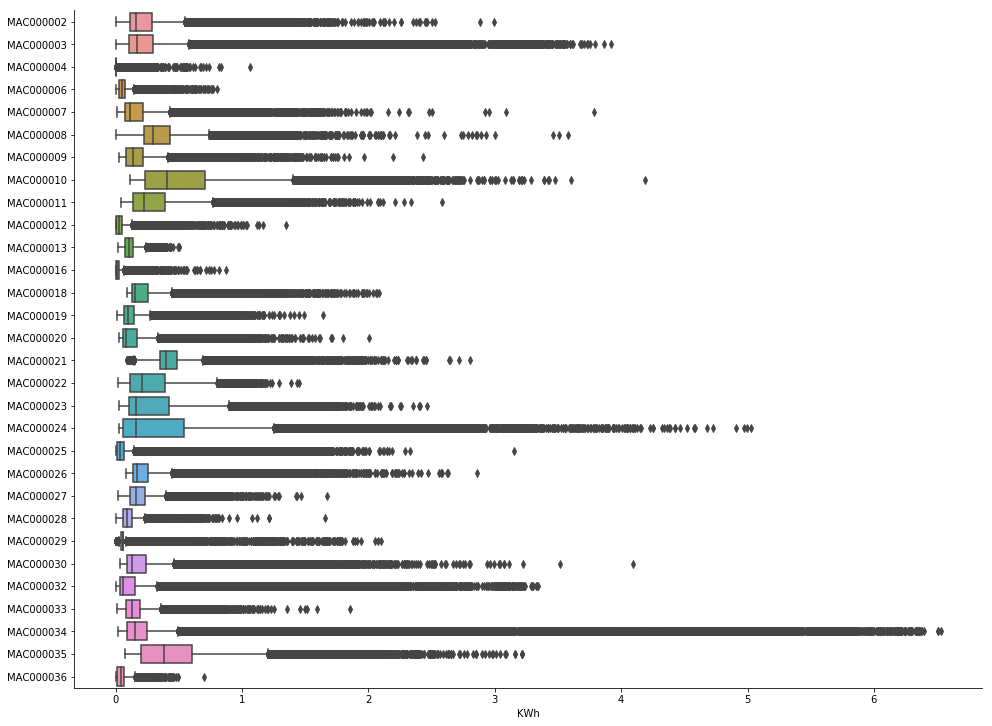

In [84]:
fig=sns.catplot(y=df.LCLid, x="KWh", kind="box",data=data,height=10, aspect=10/7.5)
plt.title('Box Plot of all households')
plt.ylabel('Unique Household ID')
plt.show(fig)

In [9]:
ids=[]
#The Unique House ids in the Dataset 
ids=data.index.unique()

In [10]:
#Finding the count of samples present for each HouseId
count=[]
c=0
for i in ids:
  c=0
  for j in data.index:
    if i==j:
      c+=1
  count.append(c)

In [11]:
print(len(count))
#The count length is equal to the number of House IDs

30


In [12]:
#A temporary variable to store the count
tcount=count.copy()

In [13]:
#A function to find the top 3 maximum elements in a list
def Nmaxelements(list1, N=3): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    return final_list 

In [14]:
#The top three sample values present in Dataset
maxim=Nmaxelements(tcount)
print("The top three samples present are "+str(maxim))

The top three samples present are [39081, 39078, 39078]


In [15]:
for i in range(len(count)):
    print(ids[i]+' '+str(count[i]))

MAC000002 24157
MAC000003 35468
MAC000004 31676
MAC000006 36460
MAC000007 25045
MAC000008 26012
MAC000009 25237
MAC000010 25048
MAC000011 23704
MAC000012 24669
MAC000013 29613
MAC000016 19523
MAC000018 39081
MAC000019 39070
MAC000020 39078
MAC000021 39078
MAC000022 39071
MAC000023 39068
MAC000024 39026
MAC000025 39064
MAC000026 39064
MAC000027 39068
MAC000028 32157
MAC000029 39063
MAC000030 39066
MAC000032 39068
MAC000033 39070
MAC000034 39069
MAC000035 39023
MAC000036 16175


In [16]:
for i in data.index.unique():
    df=data.loc[i]
    print(str(sum(df['KWh'])))
    

6101.138000699973
14104.43300269988
1120.7880000999978
2168.324999999897
4954.016999399997
9445.007000099891
4514.971000500037
13786.276997099987
7450.141000499971
1086.8299997999793
3259.806000000015
533.9679999999795
8748.44699969999
5061.868000499965
5344.0300003999055
18323.178000799933
10216.10899939983
11668.202999600016
16944.262994200024
3879.518000200242
10141.907001100037
7292.62600010005
3221.8229999000628
2764.4750010002635
9277.965000699942
10452.427996700302
6162.7610000999675
22145.13799520008
18473.795997399906
928.5489999999834


In [17]:
#finding which house ID is having the top three maximum values from the list ids created previously
label=[]
for i in range(len(maxim)):
  for j in range(len(count)):
    if maxim[i]==count[j]:
      label.append(ids[j])
      count[j]=0
      break

In [18]:
print('THE TOP THREE HOUSEIDs HAVING MAXIMUM SAMPLES ARE '+str(label))

THE TOP THREE HOUSEIDs HAVING MAXIMUM SAMPLES ARE ['MAC000018', 'MAC000020', 'MAC000021']


In [19]:
#selecting only those samples from the Dataset having maximum samples
df_m=pd.DataFrame(data.loc[label,:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

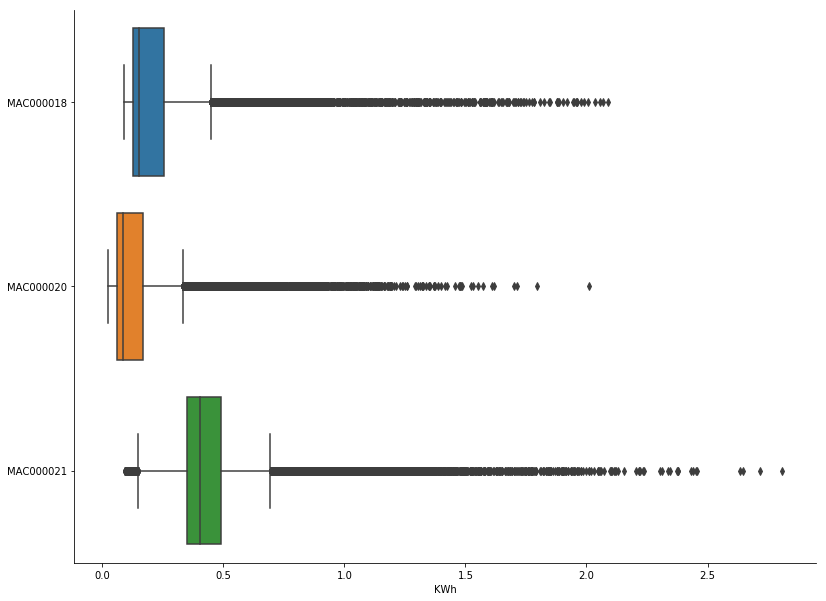

In [85]:
#Visualising the Data of those three HouseIDs
fig=sns.catplot(y=df_m.index, x="KWh", kind="box",data=df_m,height=8.27, aspect=10/7.5)
plt.title('Box Plot of the three households')
plt.ylabel('Unique Household ID')
plt.show(fig)

In [ ]:
#Setting the LCLID as index and removing the column from the data set
#df_m=df_m.drop('LCLid',axis=1)

In [22]:
#The Fist five Rows from Dataset
print(df_m.head())

                              DateTime    KWh
LCLid                                        
MAC000018  2011-12-07 09:30:00.0000000  0.303
MAC000018  2011-12-07 10:00:00.0000000  0.200
MAC000018  2011-12-07 10:30:00.0000000  0.218
MAC000018  2011-12-07 11:00:00.0000000  0.209
MAC000018  2011-12-07 11:30:00.0000000  0.210


In [23]:
#The Total consumption of the HouseIDs
energy = df_m.groupby('LCLid')[['KWh']].sum()
energy=  energy.reset_index()
print(energy)

       LCLid           KWh
0  MAC000018   8748.447000
1  MAC000020   5344.030000
2  MAC000021  18323.178001


In [24]:
#The last 5 rows of the dataset
print(df_m.tail())

                              DateTime    KWh
LCLid                                        
MAC000021  2014-02-27 22:30:00.0000000  0.475
MAC000021  2014-02-27 23:00:00.0000000  0.414
MAC000021  2014-02-27 23:30:00.0000000  0.526
MAC000021  2014-02-28 00:00:00.0000000  0.737
MAC000021  2014-02-28 00:00:00.0000000  0.737


In [25]:
df_m.describe()

,KWh
count,117237.000000
mean,0.276497
std,0.232568
min,0.024000
25%,0.116000
50%,0.202000
75%,0.384000
max,2.808000


In [26]:
#Seperating the Dataset into 3 Different Datasets each having the Maximum sample ID label samples
first=pd.DataFrame(df_m.loc[label[0]])
#print(first.describe())
first.DateTime = pd.to_datetime(first.DateTime,format='%Y-%m-%d %H')
#print(first.describe())
first.DateTime=first.DateTime.dt.strftime('%Y-%m-%d %H:00')
#print(first.describe())
second=pd.DataFrame(df_m.loc[label[1]])
second.DateTime = pd.to_datetime(second.DateTime,format='%Y-%m-%d %H')
second.DateTime=second.DateTime.dt.strftime('%Y-%m-%d %H:00')
third=pd.DataFrame(df_m.loc[label[2]])
third.DateTime = pd.to_datetime(third.DateTime,format='%Y-%m-%d %H')
third.DateTime=third.DateTime.dt.strftime('%Y-%m-%d %H:00')

In [27]:
first.describe()

,KWh
count,39081.000000
mean,0.223854
std,0.173122
min,0.088000
25%,0.128000
50%,0.152000
75%,0.256000
max,2.088000


In [28]:
#Saving the labels for reference
first_label=first.index.unique()
second_label=second.index.unique()
third_label=third.index.unique()

In [29]:
#The first five rows of the First label
print(first.head())

                   DateTime    KWh
LCLid                             
MAC000018  2011-12-07 09:00  0.303
MAC000018  2011-12-07 10:00  0.200
MAC000018  2011-12-07 10:00  0.218
MAC000018  2011-12-07 11:00  0.209
MAC000018  2011-12-07 11:00  0.210


In [30]:
#Grouping the Datasets by Datetime
first=first.groupby('DateTime')[['KWh']].sum()
first=first.reset_index()
second=second.groupby('DateTime')[['KWh']].sum()
second=second.reset_index()
third=third.groupby('DateTime')[['KWh']].sum()
third=third.reset_index()

In [37]:
first.describe()

,MAC000018
count,19528.000000
mean,0.447995
std,0.326205
min,0.189000
25%,0.258000
50%,0.311000
75%,0.518000
max,3.986000


In [38]:
second.describe()

,MAC000020
count,19528.000000
mean,0.273660
std,0.254636
min,0.065000
25%,0.122000
50%,0.180000
75%,0.333000
max,3.583000


In [31]:
third.describe()

,KWh
count,19527.000000
mean,0.938351
std,0.428995
min,0.216000
25%,0.712000
50%,0.806000
75%,0.988000
max,5.088000


In [32]:
#Setting the datasets index as Datetime
first=first.set_index('DateTime').asfreq('h')# HOURLY BASIS
second=second.set_index('DateTime').asfreq('h')# HOURLY BASIS
third=third.set_index('DateTime').asfreq('h')# HOURLY BASIS

In [33]:
first=first.rename(columns={'KWh':'MAC000018'})
second=second.rename(columns={'KWh':'MAC000020'})
third=third.rename(columns={'KWh':'MAC000021'})

In [34]:
dataframe=pd.merge(first,pd.merge(second,third,on='DateTime'),on='DateTime')

In [35]:
dataframe.describe()

,MAC000018,MAC000020,MAC000021
count,19527.000000,19527.000000,19527.000000
mean,0.448002,0.273660,0.938351
std,0.326212,0.254642,0.428995
min,0.189000,0.065000,0.216000
25%,0.258000,0.122000,0.712000
50%,0.311000,0.180000,0.806000
75%,0.518000,0.333000,0.988000
max,3.986000,3.583000,5.088000


In [107]:
dataframe[["MAC000018"]]

TypeError: '(slice(None, None, None), ['MAC000018'])' is an invalid key

In [106]:
#Visualising the Data of those three HouseIDs
fig=sns.catplot(y=dataframe.columns, x=dataframe[["MAC000018"]], kind="box",height=8.27, aspect=10/7.5)
plt.title('Box Plot of the three households')
plt.ylabel('Unique Household ID')
plt.show(fig)

ValueError: Wrong number of items passed 1, placement implies 19527

In [36]:
dataframe.tail()

,MAC000018,MAC000020,MAC000021
DateTime,,,
2014-02-27 20:00:00,0.474,0.521,0.904
2014-02-27 21:00:00,0.798,0.461,0.793
2014-02-27 22:00:00,0.755,0.417,0.975
2014-02-27 23:00:00,0.765,0.133,0.940
2014-02-28 00:00:00,0.760,0.120,1.474


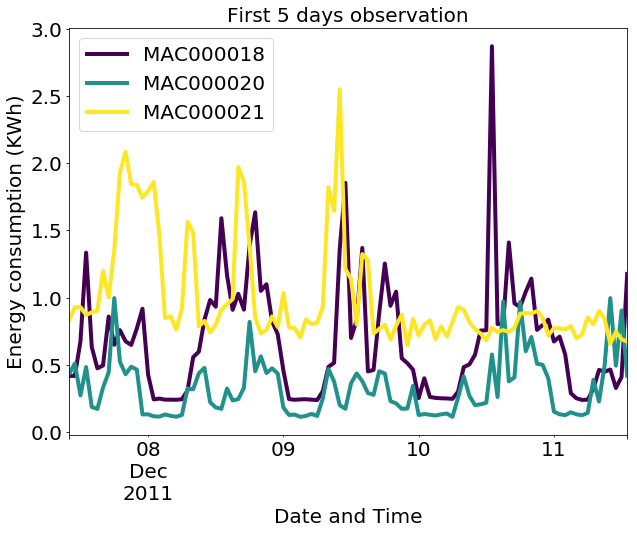

In [112]:
dataframe.head(100).plot(colormap='viridis',figsize=(10,7.5),linewidth=4,fontsize=20)
plt.legend(fontsize="20") # using a named size
plt.title('First 5 days observation',fontsize=20)
plt.ylabel('Energy consumption (KWh)',fontsize=20)
plt.xlabel('Date and Time',fontsize=20)
plt.show()

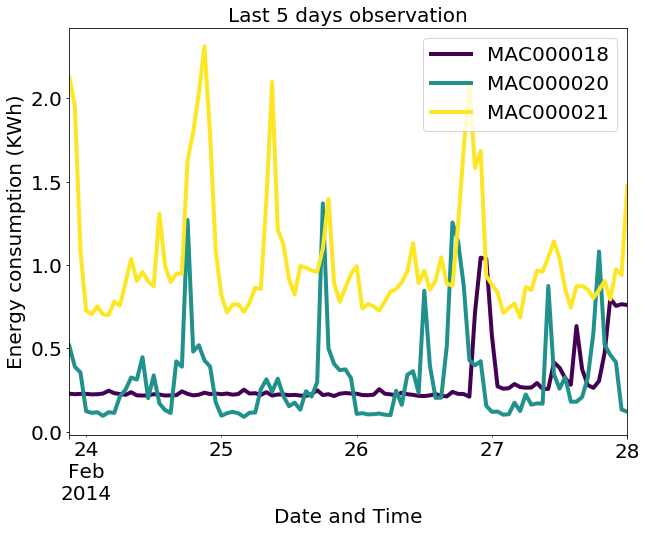

In [111]:
dataframe.tail(100).plot(colormap='viridis',figsize=(10,7.5),linewidth=4,fontsize=20)
plt.legend(fontsize="20") # using a named size
plt.title('Last 5 days observation',fontsize=20)
plt.ylabel('Energy consumption (KWh)',fontsize=20)
plt.xlabel('Date and Time',fontsize=20)
plt.show()

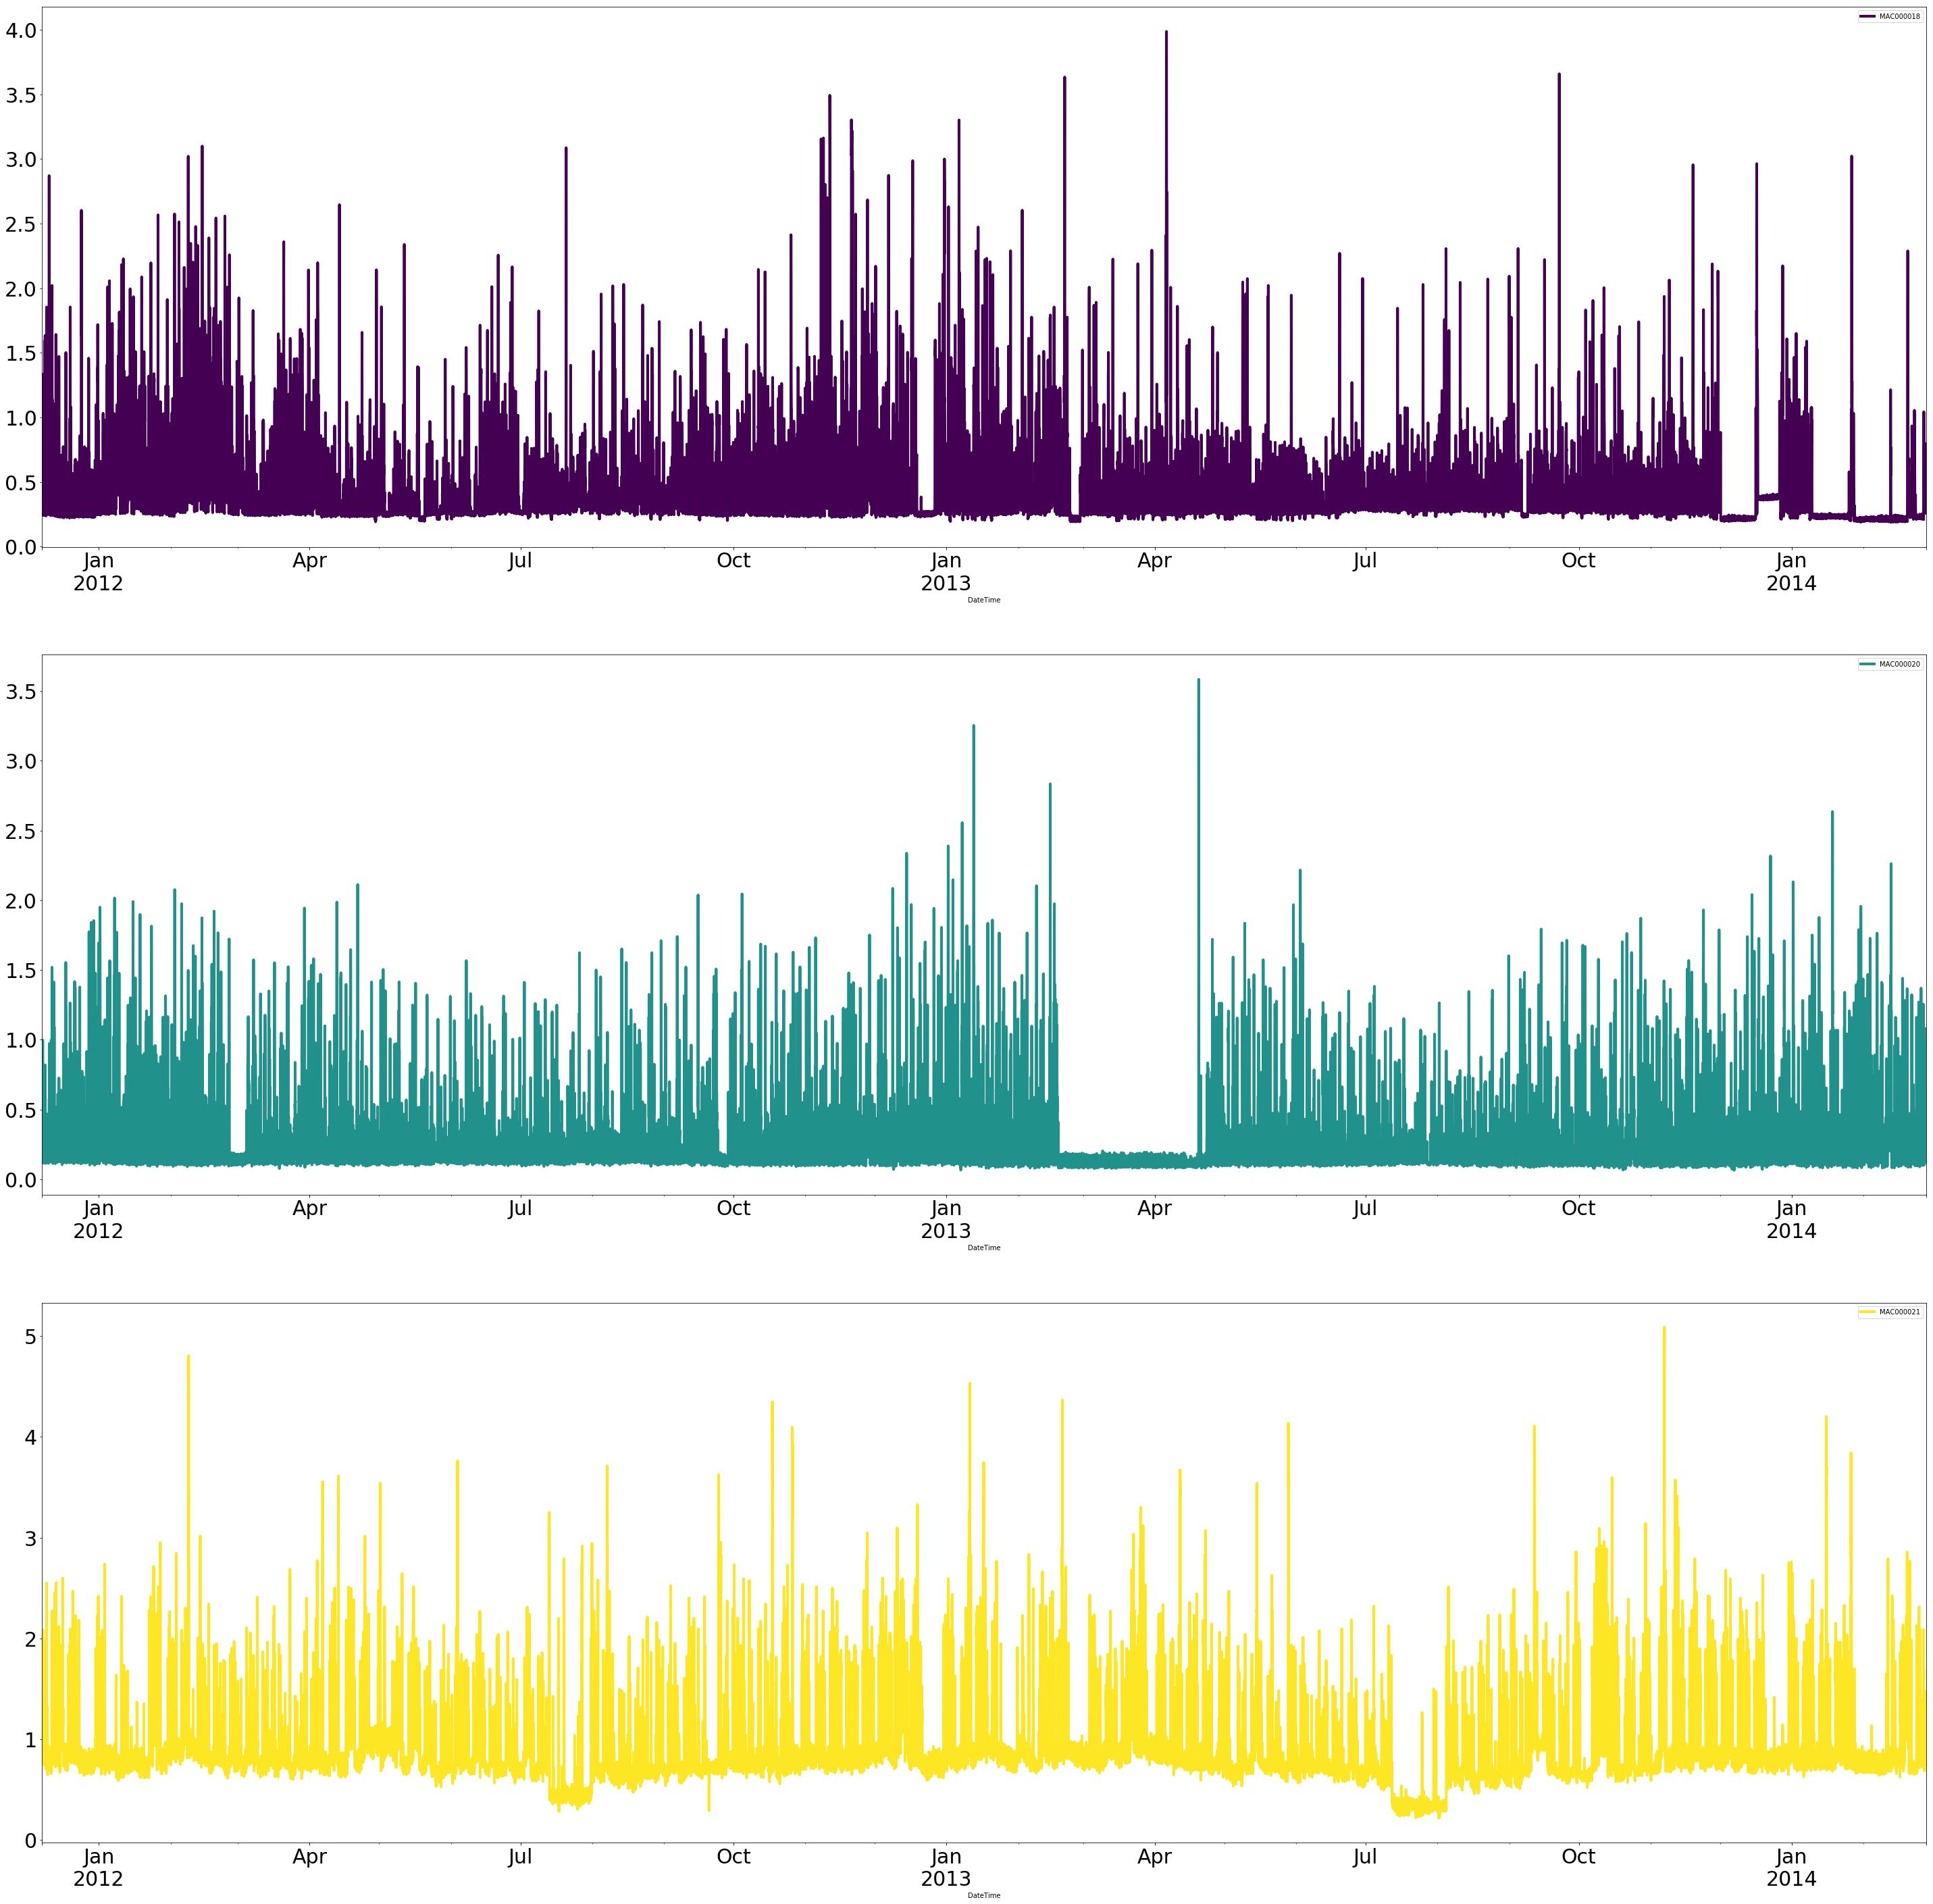

In [49]:
# Create a facetted graph with 2 rows and 4 columns
dataframe.plot(subplots=True, 
          layout=(3,1), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          figsize=(50,50),linewidth=4,fontsize=30)
# plt.legend(fontsize=30) # using a named size
plt.show()

In [ ]:
first.head()

Index(['MAC000018'], dtype='object', name='LCLid')


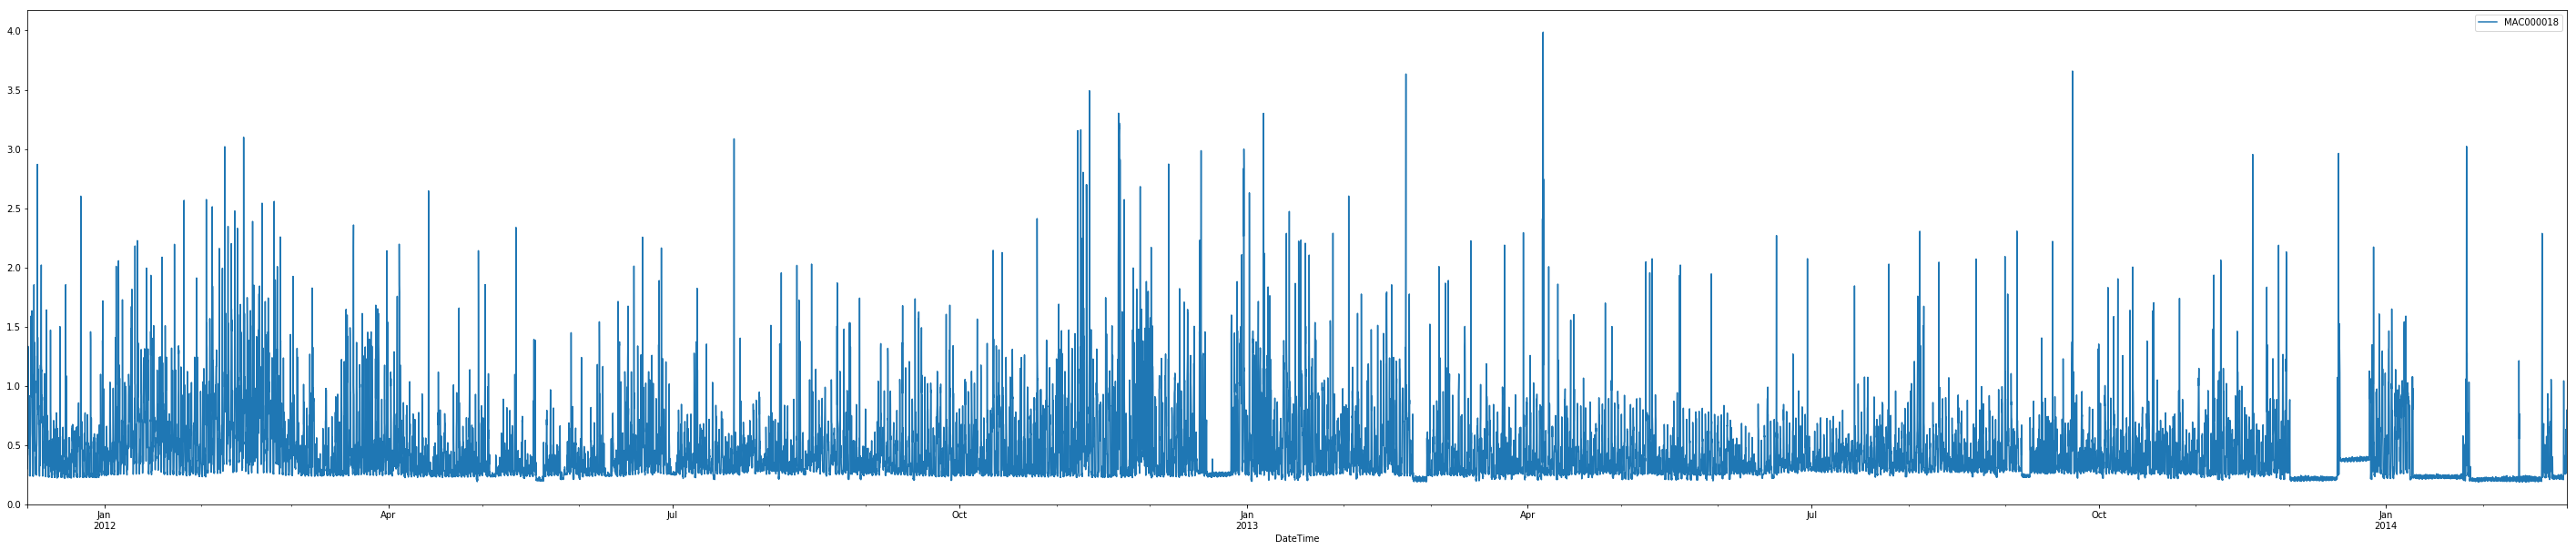

In [50]:
#Plotting the first Dataset of maximum sample HouseID
print(first_label)
first.plot(figsize=(50,10))
plt.show()

In [ ]:
#Plotting the second Dataset
print(second_label)
second.plot(figsize=(50,10))
plt.show()

In [ ]:
#Plotting the third Dataset
print(third_label)
third.plot(figsize=(50,10))
plt.show()

**Plotting the Rolling Mean and Standard Deviation of each HouseID**

In [52]:
first=first.rename(columns={'MAC000018':'KWh'})
second=second.rename(columns={'MAC000020':'KWh'})
third=third.rename(columns={'MAC000021':'KWh'})

In [ ]:
rolling_mean = first.rolling(window = 12).mean()
rolling_std = first.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(first['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best',fontsize=30)
plt.ylabel('KWh')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%('MAC000018'))
plt.show()

In [ ]:
rolling_mean = second.rolling(window = 12).mean()
rolling_std = second.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(second['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best' ,fontsize=30)
plt.ylabel('KWh')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%('MAC000020'))
plt.show()

In [ ]:
rolling_mean = third.rolling(window = 12).mean()
rolling_std = third.rolling(window = 12).std()
plt.figure(figsize=(50,10))
plt.plot(third['KWh'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best',fontsize=30)

plt.ylabel('KWh')
plt.title('Rolling Mean & Rolling Standard Deviation %s'%('MAC000021'))
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller
results1=adfuller(first['KWh'])
print(results1)
results2=adfuller(second['KWh'])
print(results2)
results3=adfuller(third['KWh'])
print(results3)

(-10.759048973499379, 2.5486015095819113e-19, 45, 19482, {'1%': -3.430685702793611, '5%': -2.8616883686189465, '10%': -2.566848972599547}, -2844.0235449517495)
(-12.877514154650884, 4.734810119516972e-24, 45, 19482, {'1%': -3.430685702793611, '5%': -2.8616883686189465, '10%': -2.566848972599547}, -5771.464795964712)
(-12.054883868739621, 2.547099857389433e-22, 45, 19481, {'1%': -3.4306857200282006, '5%': -2.8616883762355876, '10%': -2.5668489766537537}, 5154.755395986191)


In [113]:
from statsmodels.tsa.arima_model import ARMA

In [210]:
name=third
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        try:
            # Fit model
            model = ARMA(name[:-1000], order=(p,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

3 0 6110.670387510894 6149.805309543644
3 1 5716.982563660895 5763.944470100195
3 2 5544.576536832574 5599.365427678424


In [211]:
model=ARMA(name[:-1000],order=(3,2))
results=model.fit()
forecast=results.predict(start=-1000)
print(forecast)
print(results.summary())

DateTime
2013-12-06 17:00:00    0.819394
2013-12-06 18:00:00    0.902802
2013-12-06 19:00:00    0.958794
2013-12-06 20:00:00    0.879518
2013-12-06 21:00:00    0.921251
                         ...   
2014-01-17 04:00:00    0.932699
2014-01-17 05:00:00    0.838856
2014-01-17 06:00:00    0.879703
2014-01-17 07:00:00    0.948872
2014-01-17 08:00:00    0.922676
Freq: H, Length: 1000, dtype: float64
                              ARMA Model Results                              
Dep. Variable:                    KWh   No. Observations:                18527
Model:                     ARMA(3, 2)   Log Likelihood               -2765.288
Method:                       css-mle   S.D. of innovations              0.281
Date:                Mon, 12 Oct 2020   AIC                           5544.577
Time:                        15:35:17   BIC                           5599.365
Sample:                    12-07-2011   HQIC                          5562.568
                         - 01-17-2014           

In [212]:
residuals=results.resid
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
mae=np.mean(np.abs(residuals))
print('MEAN ABS ERR '+str(mae))
mape=(((np.abs(residuals)/name['KWh']).sum())*100)/len(name)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(name[len(name)-1000:],forecast))
print('ROOT MEAN SQUARE ERR '+str(rmse))


#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae=mean_absolute_error(name[len(name)-1000:],forecast)
print('MEAN ABS ERR '+str(mae))
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(name[len(name)-1000:],forecast)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(name[len(name)-1000:],forecast))
print('ROOT MEAN SQUARE ERR '+str(rmse))

MEAN ABS ERR 0.1639010869544524
MEAN ABS PERCENTAGE ERR 15.090798625461856
ROOT MEAN SQUARE ERR 0.5084300343585225
MEAN ABS ERR 0.3345910526696447
MEAN ABS PERCENTAGE ERR 34.515417776420456
ROOT MEAN SQUARE ERR 0.5084300343585225


In [123]:
# Loop over AR order
for p in range(4):
    # Loop over MA order
    for q in range(4):
        try:
            # Fit model
            model = ARMA(third[:-1000], order=(p,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

0 0 21400.90403972311 21416.558008536213
0 1 11613.347278084395 11636.828231304045
0 2 8339.279256849455 8370.587194475655
0 3 7109.700604264457 7148.835526297207
1 0 6115.328920038759 6138.809873258409
1 1 6109.82682273673 6141.13476036293
1 2 6110.5462108932115 6149.681132925962
1 3 6112.181734683669 6159.143641122969
2 0 6109.67142419525 6140.979361821451
2 1 5780.588922234623 5819.723844267373
2 2 5726.304918165908 5773.266824605208
2 3 5687.937828749309 5742.726719595159
3 0 6110.670387510894 6149.805309543644
3 1 5716.982563660895 5763.944470100195
3 2 5544.576536832574 5599.365427678424
3 3 5545.104457724636 5607.7203329770355


In [149]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [196]:
name=third
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        try:
            # Fit model
            model = ARIMA(name[:-1000], order=(p,0,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

0 0 21400.90403972311 21416.558008536213
0 1 11613.347278084395 11636.828231304045
0 2 8339.279256849455 8370.587194475655
1 0 6115.328920038759 6138.809873258409
1 1 6109.82682273673 6141.13476036293
1 2 6110.5462108932115 6149.681132925962
2 0 6109.67142419525 6140.979361821451
2 1 5780.588922234623 5819.723844267373
2 2 5726.304918165908 5773.266824605208


In [197]:
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        try:
            # Fit model
            model = ARIMA(name[:-1000], order=(p,1,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

0 0 8590.58129140866 8606.235152268287
0 1 8311.461935388303 8334.942726677744
0 2 7833.233557328313 7864.541279047568
1 0 8377.675341455099 8401.15613274454
1 1 None None
1 2 None None
2 0 8158.951302785863 8190.259024505119
2 1 None None
2 2 5674.486578692195 5721.448161271079


In [219]:
name=third
size = int(len(name)-1000)
train, test = name[0:size], name[size:len(name)]
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)
resid=model_fit.resid
print(fitted.summary())
fc, se, conf = fitted.forecast(1000)
predicted = pd.Series(fc, index=test.index)
print(predicted)

                             ARIMA Model Results                              
Dep. Variable:                  D.KWh   No. Observations:                18526
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2831.243
Method:                       css-mle   S.D. of innovations              0.282
Date:                Mon, 12 Oct 2020   AIC                           5674.487
Time:                        15:43:02   BIC                           5721.448
Sample:                    12-07-2011   HQIC                          5689.908
                         - 01-17-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.753e-06      0.000     -0.007      0.994      -0.000       0.000
ar.L1.D.KWh     1.4337      0.030     47.590      0.000       1.375       1.493
ar.L2.D.KWh    -0.5616      0.020    -27.529    

In [220]:
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae=mean_absolute_error(test,predicted)
print('MEAN ABS ERR '+str(mae))
mape=(((np.abs(resid)/name['KWh']).sum())*100)/len(name)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(test,predicted))
print('ROOT MEAN SQUARE ERR '+str(rmse))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(test,predicted)
print('MEAN ABS PERCENTAGE ERR '+str(mape))


MEAN ABS ERR 0.3711726614996028
MEAN ABS PERCENTAGE ERR 14.73081215563368
ROOT MEAN SQUARE ERR 0.42676440810987804
MEAN ABS PERCENTAGE ERR 41.0027817388474


In [223]:
name=first
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(6):
        try:
            # Fit model
            model = SARIMAX(name[:-1000], order=(p,0,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

0 0 None None
0 1 None None
0 2 None None
0 3 None None
0 4 None None
0 5 None None
1 0 None None
1 1 None None
1 2 None None
1 3 None None
1 4 None None
1 5 None None
2 0 None None
2 1 None None
2 2 None None
2 3 None None
2 4 None None
2 5 None None


In [225]:
# Loop over AR order
for p in range(10):
    # Loop over MA order
    for q in range(10):
        try:
            # Fit model
            model = SARIMAX(name[:-1000], order=(p,1,q))
            results = model.fit()
            # Print the model order and the AIC/BIC values
            print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

0 0 None None
0 1 None None
0 2 None None
0 3 None None
0 4 None None
0 5 None None
0 6 None None
0 7 None None
0 8 None None
0 9 None None
1 0 None None
1 1 None None
1 2 None None
1 3 None None
1 4 None None
1 5 None None
1 6 None None
1 7 None None
1 8 None None
1 9 None None
2 0 None None
2 1 None None
2 2 None None
2 3 None None
2 4 None None
2 5 None None
2 6 None None
2 7 None None
2 8 None None
2 9 None None
3 0 None None
3 1 None None
3 2 None None
3 3 None None
3 4 None None
3 5 None None
3 6 None None
3 7 None None
3 8 None None
3 9 None None
4 0 None None
4 1 None None
4 2 None None
4 3 None None
4 4 None None
4 5 None None
4 6 None None
4 7 None None
4 8 None None
4 9 None None
5 0 None None
5 1 None None
5 2 None None
5 3 None None
5 4 None None
5 5 None None
5 6 None None
5 7 None None
5 8 None None
5 9 None None
6 0 None None
6 1 None None
6 2 None None
6 3 None None
6 4 None None
6 5 None None
6 6 None None
6 7 None None
6 8 None None
6 9 None None
7 0 None None
7 1 No

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(first,order=(1,0,1))
results=model.fit()
forecast=results.get_prediction(start=-1000)
mean_forecast=(forecast.predicted_mean)
confidence=(forecast.conf_int())
lower=confidence.iloc[:,0]
upper=confidence.iloc[:,1]
print(results.summary())

In [ ]:
residuals=results.resid
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae=mean_absolute_error(name[len(name)-1000:],forecast)
print('MEAN ABS ERR '+str(mae))
mape=(((np.abs(resid)/name['KWh']).sum())*100)/len(name)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(name[len(name)-1000:],forecast))
print('ROOT MEAN SQUARE ERR '+str(rmse))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(name[len(name)-1000:],forecast)
print('MEAN ABS PERCENTAGE ERR '+str(mape))


In [ ]:
plt.rc('font',size=30)
results.plot_diagnostics(figsize=(50,20))
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(first.iloc[-1000:-500].index,first.iloc[-1000:-500],label='observed')
plt.plot(mean_forecast.index,mean_forecast.values,color='red',label='forecast')
plt.fill_between(mean_forecast.index,lower,upper,color='pink')
plt.legend()
plt.xlabel('DATE')
plt.ylabel('KWh')
plt.rc('font',size=30)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(second,order=(1,0,0))
results=model.fit()
forecast=results.get_prediction(start=-1000)
mean_forecast=(forecast.predicted_mean)
confidence=(forecast.conf_int())
lower=confidence.iloc[:,0]
upper=confidence.iloc[:,1]
print(results.summary())

In [ ]:
residuals=results.resid
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae=mean_absolute_error(name[len(name)-1000:],forecast)
print('MEAN ABS ERR '+str(mae))
mape=(((np.abs(resid)/name['KWh']).sum())*100)/len(name)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(name[len(name)-1000:],forecast))
print('ROOT MEAN SQUARE ERR '+str(rmse))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(name[len(name)-1000:],forecast)
print('MEAN ABS PERCENTAGE ERR '+str(mape))


In [ ]:
plt.rc('font',size=30)
results.plot_diagnostics(figsize=(50,20))
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(second.iloc[-1000:-500].index,second.iloc[-1000:-500],label='observed')
plt.plot(mean_forecast.index,mean_forecast.values,color='red',label='forecast')
plt.fill_between(mean_forecast.index,lower,upper,color='pink')
plt.legend()
plt.xlabel('DATE')
plt.ylabel('KWh')
plt.rc('font',size=30)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(third,order=(1,0,4))
results=model.fit()
forecast=results.get_prediction(start=-500)
mean_forecast=(forecast.predicted_mean)
confidence=(forecast.conf_int())
lower=confidence.iloc[:,0]
upper=confidence.iloc[:,1]
print(results.summary())

In [ ]:
residuals=results.resid
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mae=mean_absolute_error(name[len(name)-1000:],forecast)
print('MEAN ABS ERR '+str(mae))
mape=(((np.abs(resid)/name['KWh']).sum())*100)/len(name)
print('MEAN ABS PERCENTAGE ERR '+str(mape))
rmse = sqrt(mean_squared_error(name[len(name)-1000:],forecast))
print('ROOT MEAN SQUARE ERR '+str(rmse))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error(name[len(name)-1000:],forecast)
print('MEAN ABS PERCENTAGE ERR '+str(mape))


In [ ]:
plt.rc('font',size=30)
results.plot_diagnostics(figsize=(50,20))
plt.show()

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(third.iloc[-1000:-500].index,third.iloc[-1000:-500],label='observed')
plt.plot(mean_forecast.index,mean_forecast.values,color='red',label='forecast')
plt.fill_between(mean_forecast.index,lower,upper,color='pink')
plt.legend()
plt.xlabel('DATE')
plt.ylabel('KWh')
plt.rc('font',size=30)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(50,20))
plot_acf(third,lags=10,zero=False,ax=ax1)
plot_pacf(third,lags=10,zero=False,ax=ax2)
plt.show()

**Forecast using ARIMA**

In [ ]:
#Importing Necessary Libraries
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import itertools
from random import random
from sklearn.metrics import mean_squared_error

In [ ]:
#A Describe Function of Summary of fitting into ARIMA
def describe(file):
  model = ARIMA(file['KWh'], order=(2,1,0))
  model_fit = model.fit(disp=0)
  print(model_fit.summary())
  # plot residual errors
  residuals = pd.DataFrame(model_fit.resid)
  residuals.plot()
  plt.title("Residual Plot")
  plt.show()
  residuals.plot(kind='kde')
  plt.title("Probability Distribution Function")
  plt.show()
  print(residuals.describe())

In [ ]:
#Plotting the Graph of PREDICTED Vs TEST
def errgraph(predictions,test):
  error = mean_squared_error(test, predictions)
  print('Test Mean Squared Error: %.3f' % error)
  # plot
  plt.figure(figsize=(50,10))
  plt.plot(test)
  plt.plot(predictions, color='red')
  plt.legend(['Data','Predicted'])
  plt.xlabel('Date')
  plt.ylabel('KWh Consumption')
  plt.show()

First House ID

In [ ]:
#Summary of Fitting into ARIMA
describe(first)

In [ ]:
#Predicting USING ARIMA
X = first['KWh'].values
size = int(len(X) * 0.66) # Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
f_train, f_test = X[0:size], X[size:len(X)]
history = [x for x in f_train]
f_predictions = []
for t in range(10): #Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))**
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    f_model_fit = model.fit(disp=0)
    output = f_model_fit.forecast()
    yhat = output[0]
    f_predictions.append(yhat)
    obs = f_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

In [ ]:
# Plotting Graph for prediction vs observed
print(first_label)
errgraph(f_predictions,f_test[:10]) # Since using only 500 for fast results, if needed use f_test fully for whole prediction when range is made as range(test) in the above cell

Second House ID

In [ ]:
#Summary of Fitting into ARIMA
describe(second)

In [ ]:
#Predicting USING ARIMA
X = second['KWh'].values
size = int(len(X) * 0.66) # Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
s_train, s_test = X[0:size], X[size:len(X)]
history = [x for x in s_train]
s_predictions = []
for t in range(10):# Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))** 
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    s_model_fit = model.fit(disp=0)
    output = s_model_fit.forecast()
    yhat = output[0]
    s_predictions.append(yhat)
    obs = s_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

In [ ]:
# Plotting Graph for prediction vs observed
print(second_label)
errgraph(s_predictions,s_test[:10])# Since using only 500 for fast results, if needed use s_test fully for whole prediction when range is made as range(test) in the above cell

Third House ID

In [ ]:
#Summary of Fitting into ARIMA
describe(third)

In [ ]:
#Predicting USING ARIMA
X = third['KWh'].values
size = int(len(X) * 0.66)# Train size is 2/3rd of HouseID sample, Test size is last 1/3rd of HouseID sample
t_train, t_test = X[0:size], X[size:len(X)]
history = [x for x in t_train]
t_predictions = []
for t in range(10):# Predicting with Test only for 500 values for faster results, in order to see the whole result use **range(len(test))**
    model = ARIMA(history, order=(2,1,0))# order has lowest aic value
    t_model_fit = model.fit(disp=0)
    output = t_model_fit.forecast()
    yhat = output[0]
    t_predictions.append(yhat)
    obs = t_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f, count=%d' % (yhat, obs,t))

In [ ]:
# Plotting Graph for prediction vs observed
print(third_label)
errgraph(t_predictions,t_test[:10])# Since using only 500 for fast results, if needed use t_test fully for whole prediction when range is made as range(test) in the above cell

Since ARIMA takes a lot of time to process and forecast the whole data going for Seasonal ARIMA (SARIMAX)

**SARIMAX FORECAST**

FIRST HOUSE ID

In [ ]:
#Reading only the KWh consumption into y
y = first['KWh'].resample('h').mean()# HoURLY BASIS

In [ ]:
#The first five rows
print(y.head())

In [ ]:
#The last five rows
print(y.tail())

In [ ]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(first_label)
plt.show()

In [ ]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,0,1),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

In [ ]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(50, 20))
plt.show()

In [ ]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2013-06-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2012-12':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(first_label)
plt.legend()
plt.show()

In [ ]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

SECOND HOUSE ID

In [ ]:
#Reading only the KWh consumption into y
y= second['KWh'].resample('h').mean()# HOURLY BASIS

In [ ]:
#The first five rows
print(y.head())

In [ ]:
#The last five rows
print(y.tail())

In [ ]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(second_label)
plt.show()

In [ ]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,1,0),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2014-02-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2013-12':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(second_label)
plt.legend()
plt.show()

In [ ]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

THIRD HOUSE ID

In [ ]:
#Reading only the KWh consumption into y
y = third['KWh'].resample('h').mean()

In [ ]:
#The first five rows
print(y.head())

In [ ]:
#The last five rows
print(y.tail())

In [ ]:
#Plotting the dataset
ax=y.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(third_label)
plt.show()

In [ ]:
#Seasonal Decomposition plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
#Fitting the model and Showing Summary
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2,1,0),# order has lowest aic value
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
#Diagonstics Plot
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#FORECASTING THE PREDICTED VALUES
pred = results.get_prediction(start=pd.to_datetime('2014-02-01'), dynamic=False)#Starting forecasting from February 2014
pred_ci = pred.conf_int()
ax = y['2014-01':].plot(label='observed')#Showing from December 2013
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(25, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KWh Consumption')
plt.title(third_label)
plt.legend()
plt.show()

In [ ]:
#Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
#Root Mean Squared Error
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))